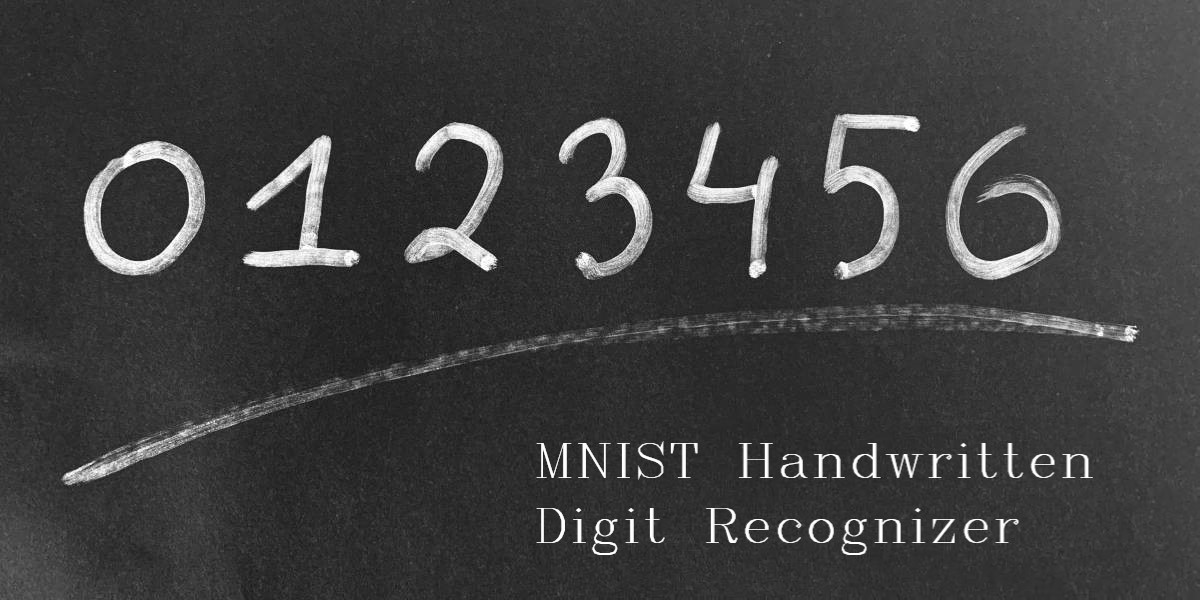

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import torch
torch.cuda.is_available()

True

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
df_Train=pd.read_csv('../input/digit-recognizer/train.csv')
df_Test=pd.read_csv('../input/digit-recognizer/test.csv')

In [5]:
print(df_Train.shape)
print(df_Test.shape)

(42000, 785)
(28000, 784)


In [6]:
X = df_Train.iloc[:, 1:].values
y = df_Train.iloc[:, 0].values

In [7]:
print(X.shape)
print(y.shape)

(42000, 784)
(42000,)


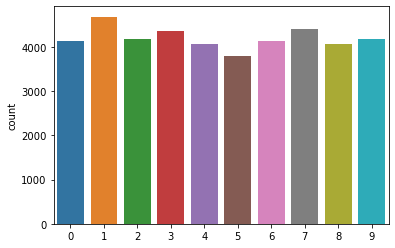

In [8]:
sns.countplot(y)

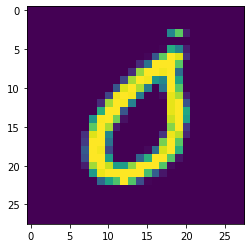

In [9]:
 plt.imshow(X[1029].reshape((28,28)),interpolation='nearest')

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [11]:
X = X.reshape(X.shape[0], 28, 28, 1)
X.shape

(42000, 28, 28, 1)

In [12]:
df_Test=scaler.fit_transform(df_Test)
df_Test = df_Test.reshape(df_Test.shape[0], 28, 28, 1)

In [13]:
df_Test.shape

(28000, 28, 28, 1)

In [14]:
y = y.reshape(y.shape[0], 1)
print (y.shape)

(42000, 1)


In [15]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y)

print (y.shape)

(42000, 10)


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=2)

In [17]:
print(X_train.shape)
print(X_test.shape)

(37800, 28, 28, 1)
(4200, 28, 28, 1)


In [18]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

Using TensorFlow backend.


In [19]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [20]:
optimizer = Adam(lr=0.001, epsilon=1e-08, decay=0.0)

In [21]:
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics=["accuracy"])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.0001)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)         

In [22]:
batch_size=100
epoch=15

In [23]:
history = model.fit(X_train,y_train, batch_size=batch_size,epochs = epoch, validation_data = (X_test,y_test), callbacks=[learning_rate_reduction])

Train on 37800 samples, validate on 4200 samples
Epoch 1/15
37800/37800 [==============================] - 7s 176us/step - loss: 0.2777 - accuracy: 0.9144 - val_loss: 0.0611 - val_accuracy: 0.9810
Epoch 2/15
 2200/37800 [>.............................] - ETA: 2s - loss: 0.1055 - accuracy: 0.9677

/opt/conda/lib/python3.7/site-packages/keras/callbacks/callbacks.py:1042: RuntimeWarning: Reduce LR on plateau conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


37800/37800 [==============================] - 3s 80us/step - loss: 0.0806 - accuracy: 0.9757 - val_loss: 0.0374 - val_accuracy: 0.9879
Epoch 3/15
37800/37800 [==============================] - 3s 79us/step - loss: 0.0600 - accuracy: 0.9818 - val_loss: 0.0360 - val_accuracy: 0.9898
Epoch 4/15
37800/37800 [==============================] - 3s 83us/step - loss: 0.0476 - accuracy: 0.9860 - val_loss: 0.0343 - val_accuracy: 0.9900
Epoch 5/15
37800/37800 [==============================] - 3s 85us/step - loss: 0.0419 - accuracy: 0.9873 - val_loss: 0.0301 - val_accuracy: 0.9917
Epoch 6/15
37800/37800 [==============================] - 3s 79us/step - loss: 0.0417 - accuracy: 0.9873 - val_loss: 0.0265 - val_accuracy: 0.9921
Epoch 7/15
37800/37800 [==============================] - 3s 90us/step - loss: 0.0316 - accuracy: 0.9903 - val_loss: 0.0310 - val_accuracy: 0.9907
Epoch 8/15
37800/37800 [==============================] - 3s 83us/step - loss: 0.0279 - accuracy: 0.9913 - val_loss: 0.0269 - val

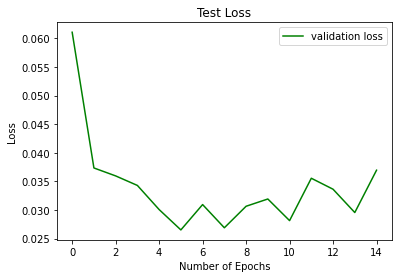

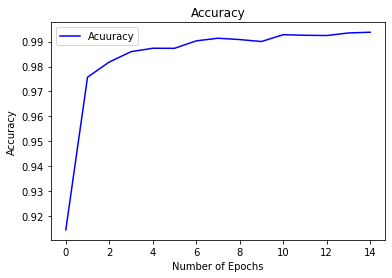

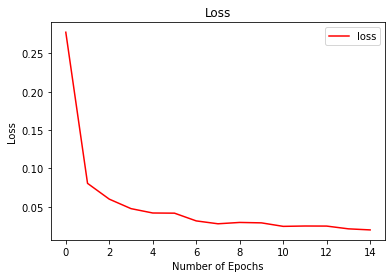

In [24]:
plt.plot(history.history['val_loss'], color='g', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.plot(history.history['accuracy'], color='b', label="Acuuracy")
plt.title("Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
plt.plot(history.history['loss'], color='r', label="loss")
plt.title("Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Test Score: 0.03696343254046691
Test Accuracy: 0.9938095211982727


<Figure size 432x288 with 0 Axes>

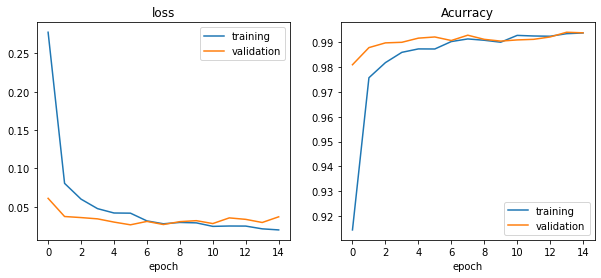

In [25]:
plt.figure()
fig,(ax1, ax2)=plt.subplots(1,2,figsize=(10,4))
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.legend(['training','validation'])
ax1.set_title('loss')
ax1.set_xlabel('epoch')

ax2.plot(history.history['accuracy'])
ax2.plot(history.history['val_accuracy'])
ax2.legend(['training','validation'])
ax2.set_title('Acurracy')
ax2.set_xlabel('epoch')



score =model.evaluate(X_test,y_test,verbose=0)
print('Test Score:',score[0])
print('Test Accuracy:',score[1])

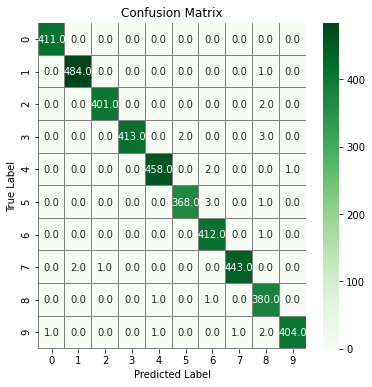

In [26]:
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
# Convert predictions classes to one hot vectors 
pred_classes = np.argmax(pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(6, 6))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

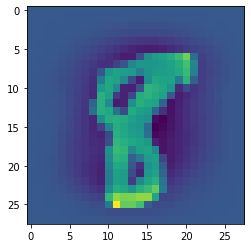

In [27]:
plt.imshow(X_test[120].reshape(28,28),interpolation='nearest')
plt.show()

In [28]:
image = X_test[120]
test_img = image.reshape(1,28,28,1)

preds = model.predict(test_img)
print("The predicted number is: ",np.argmax(preds))

The predicted number is:  8


In [29]:
results = model.predict(df_Test)
results = np.argmax(results,axis = 1)
results

array([2, 0, 9, ..., 3, 9, 2])